In [11]:
import mlatom as ml

In [12]:
# here we demonstrate on an example of benzene molecule how to calculate its UV/vis spectrum via single-point convolution
# load the initial guess for geometry
mol = ml.data.molecule.from_xyz_string('''12

C        0.00000000      1.39110400      0.00000000
C        1.20473100      0.69555200      0.00000000
C        1.20473100     -0.69555200      0.00000000
C       -0.00000000     -1.39110400      0.00000000
C       -1.20473100     -0.69555200     -0.00000000
C       -1.20473100      0.69555200      0.00000000
H        0.00000000      2.47330200      0.00000000
H        2.14194200      1.23665100      0.00000000
H        2.14194200     -1.23665100      0.00000000
H       -0.00000000     -2.47330200      0.00000000
H       -2.14194200     -1.23665100     -0.00000000
H       -2.14194200      1.23665100      0.00000000
''')

# define the method
aiqm1 = ml.models.methods(method='AIQM1')

# optimize the geometry in the ground state (can be done in a different method than used for calculating excited-state properties)
ml.optimize_geometry(molecule=mol, model=aiqm1)
print('Optimized geometry:\n')
print(mol.get_xyz_string())


Optimized geometry:

12

C             0.0000000000000           1.3925401460472           0.0000000000000
C             1.2059751422665           0.6962700730233           0.0000000000000
C             1.2059751422665          -0.6962700730233           0.0000000000000
C            -0.0000000000000          -1.3925401460472           0.0000000000000
C            -1.2059751422665          -0.6962700730233           0.0000000000000
C            -1.2059751422665           0.6962700730233           0.0000000000000
H             0.0000000000000           2.4748778305515           0.0000000000000
H             2.1433070725205           1.2374389152757           0.0000000000000
H             2.1433070725205          -1.2374389152757           0.0000000000000
H            -0.0000000000000          -2.4748778305515           0.0000000000000
H            -2.1433070725205          -1.2374389152757           0.0000000000000
H            -2.1433070725205           1.2374389152757           0.00000

In [13]:
# perform single-point excited-state calculations
aiqm1.predict(molecule=mol, 
                nstates=30, # Number of electronic states to calculate
                )
# after all this work, let's dump the molecule so that we can re-use the calculations later if needed:
mol.dump(filename='benzene.json', format='json')
# you can load it later as
# mol = ml.molecule.load(filename='benzene.json', format='json')

# show the excitation energies and oscillator strengths
print(f'Excitation energies in eV: {mol.excitation_energies*ml.constants.hartree2eV}')
print(f'Oscillator strengths: {mol.oscillator_strengths}')

Excitation energies in eV: [5.3710049  5.60304691 6.61331818 6.67385531 6.67385531 6.76922225
 7.08701569 7.08701569 7.09072088 7.09072088 7.19999454 7.33800668
 7.33800668 7.68971288 7.68971288 7.78272969 7.94352801 7.94352801
 8.03701885 8.03701885 8.04044002 8.3125381  8.3125381  8.35760543
 8.49747267 8.51403753 8.51403753 8.52262497 8.52262497]
Oscillator strengths: [0.0, 0.0, 0.0, 0.0, 0.0, 0.001118, 0.0, 0.0, 0.200732, 0.200732, 0.0, 0.0, 0.0, 0.0, 0.0, 0.035603, 2.750769, 2.750769, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [14]:
mol = ml.molecule.load(filename='benzene.json', format='json')

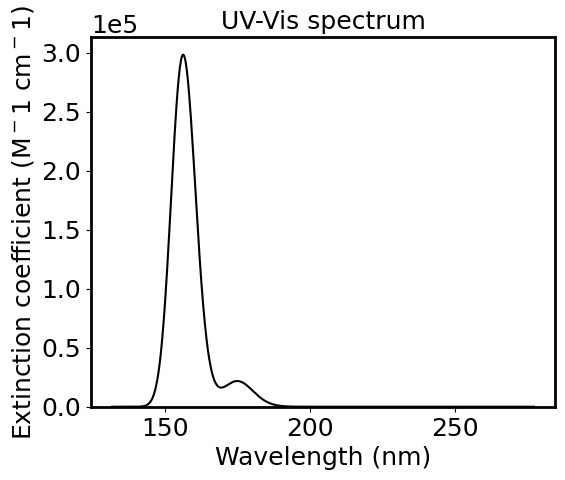

In [15]:
# now we can use single-point convolution to obtain UV/vis absorption spectrum from our calculations
spectrum = ml.spectra.uvvis.spc(molecule=mol, band_width=0.3)
# dump spectrum in a text or npy format
spectrum.dump('benzene_spc.txt', format='txt')
# you can load it later as
# spectrum = ml.spectra.uvvis.load('benzene_spc.txt', format='txt')
# quick plot to save the spectrum in a file or check it in the Jupyter notebook
spectrum.plot(filename='UVvis.png')

In [ ]:
# it might be useful to use dedicated plotting routines which are more flexible,
# e.g., for showing the slider to interactively modify the broadening width in Jupyter notebook
ml.spectra.plot_uvvis(molecule=mol,
               normalize=True,
               spc=True, band_width=0.06,
               band_width_slider=True, # might want to swith off if not used interactively
               )

interactive(children=(FloatSlider(value=0.06, description='width (eV):', max=0.5, min=0.01, step=0.01), Output…

In [22]:
# more useful might be comparison to experiment
# let's get the experimental spectrum from file (got from NIST, baseline is not removed)
wavelengths = []
cross_section = []
import numpy as np

raw_data = np.loadtxt(f'benzene_exp.dat').T
exp_spectrum = ml.spectra.uvvis(wavelengths_nm=raw_data[0],molar_absorbance=raw_data[1])

In [ ]:
ml.spectra.plot_uvvis(spectra=[exp_spectrum], 
               molecule=mol,
               normalize=True,
               labels=['experiment', 'theory'],
               shift=True,
               spc=True, band_width=0.06,
               band_width_slider=True,
               filename='UVvis_sp_comparison.png'
               #plotstart=300, plotend=600, # other potentially useful options
               #linespectra=[linespec]
               )

interactive(children=(FloatSlider(value=0.06, description='width (eV):', max=0.5, min=0.01, step=0.01), Output…